## Introduction to Visualizing Humanities Data

Welcome to our first notebook 🥳✨! 

In this notebook, we'll be working through the basics of Altair, a declarative visualization library in Python, and also doing a brief refresher on Pandas for data manipulation.

### Let's make a chart!

What's the first step in any notebook or Python script? Import your modules! Today we'll be using three libraries, [Pandas](https://pandas.pydata.org/), [Altair](https://altair-viz.github.io/index.html), and [Vega Datasets](https://github.com/vega/vega-datasets)

In [43]:
import pandas as pd
import altair as alt
from vega_datasets import data as vega_data

We're going to jump in quickly but if you ever get a bit lost please don't hesistate to speak up in the chat or refer back to Melanie Walsh's Pandas workshop from last week [https://github.com/melaniewalsh/Data-Analysis-with-Pandas](https://github.com/melaniewalsh/Data-Analysis-with-Pandas)

To build from Melanie's workshop we're going to start by recreating one of her graphs into Altair.

In [67]:
# Let's load in the Seattle Circulation data from Melanie's workshop
seattle_df = pd.read_csv('Seattle-Library_2015-2021.csv', delimiter=",", encoding="utf-8")

** QUICK QUESTION** how can we see what is inside this dataset?

In [68]:
### CODE FOR INSPECTING DATA GOES HERE *hint* think of heads and tails 😅
seattle_df.head()

<AxesSubplot:>

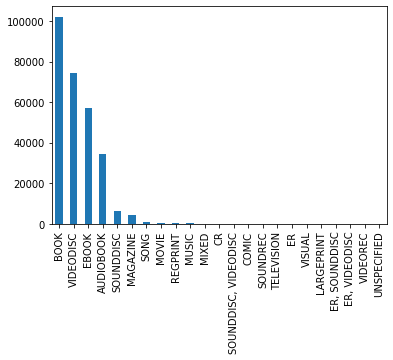

In [69]:
# Let's remake this graph
seattle_df['MaterialType'].value_counts().plot(kind='bar')

Worth noting that this is a perfectly great graph and it doesn't use Altair. You can read more about how Pandas creates plots here ([https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) and for reference Pandas uses Matplotlib - remember spectrum of tools!) but let's also think what we want to visualize that is missing in this graph.

So first thing is identify the type of chart (helpfully included with `kind='bar'`) and then look at how Altair creates bar charts. If you go to Altair's example gallery [https://altair-viz.github.io/gallery/index.html](https://altair-viz.github.io/gallery/index.html), you'll see that the first example is a simple bar chart [https://altair-viz.github.io/gallery/simple_bar_chart.html](https://altair-viz.github.io/gallery/simple_bar_chart.html) and I've copied the code below. 

In [70]:
source = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})

alt.Chart(source).mark_bar().encode(
    x='a',
    y='b'
)

alt.Chart(...)

You should now see the following graph:
![bar_chart](images/bar_chart.png)

If you don't you might either need to enable altair to work in your notebook (follow instructions here [https://altair-viz.github.io/user_guide/display_frontends.html#displaying-in-the-jupyter-notebook](https://altair-viz.github.io/user_guide/display_frontends.html#displaying-in-the-jupyter-notebook)) or set the kernel of your notebook if you are running locally [https://stackoverflow.com/questions/28831854/how-do-i-add-python3-kernel-to-jupyter-ipython](https://stackoverflow.com/questions/28831854/how-do-i-add-python3-kernel-to-jupyter-ipython) or set the vega extension with following:

```sh
jupyter nbextension install --sys-prefix --py vega
```
I know this seems like a lot of troubleshooting but fingers crossed, hopefully none of us need it!

*So let's breakdown what we're doing here*

First we are specifying a new `Chart` class. In Altair, there are a number of Chart types that we'll delve into later but it essentially is the basic class we'll be working with.
![chart_types](images/chart_types.png)

We pass our data to the `Chart` and then specify the type of `mark` we are using (in our case we are using `mark_bar()` to make bars). In Altair, we can use all types of marks to represent our data [https://altair-viz.github.io/user_guide/marks.html](https://altair-viz.github.io/user_guide/marks.html). 

![marks](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1587438135/mark_properties_qyymyh.png)

Finally we are using something called encoding to tell Altair what variables we want to represent on the `x` and `y` axis. Altair has many fields for encoding [https://altair-viz.github.io/user_guide/encoding.html](https://altair-viz.github.io/user_guide/encoding.html) that we'll explore over this week (as well what we even mean by encoding)

So first we need to figure out what exactly Melanie graphed, how would you describe what's in her bar chart? What is on the `x` and `y` axis? Is she specifying color? (here it is again for refresher 👇🏽)

<AxesSubplot:>

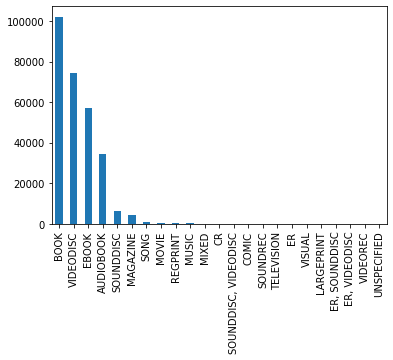

In [82]:
seattle_df['MaterialType'].value_counts().plot(kind='bar')

To put it in plain language, it seems like she's selecting the column `MaterialType`, which contains a list of categories, and then graphing their values. If we understand what's being graphed, then the next step is to look at how the data is formatted, so let's explore the output of `value_counts` (for reference here is the documentation in the Pandas API [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)).

In [80]:
seattle_df['MaterialType'].value_counts()

BOOK                    102076
VIDEODISC                74473
EBOOK                    57299
AUDIOBOOK                34542
SOUNDDISC                 6593
MAGAZINE                  4197
SONG                       975
MOVIE                      596
REGPRINT                   447
MUSIC                      382
MIXED                      195
CR                         112
SOUNDDISC, VIDEODISC        89
COMIC                       83
SOUNDREC                    82
TELEVISION                  39
ER                          34
VISUAL                      31
LARGEPRINT                  19
ER, SOUNDDISC               10
ER, VIDEODISC                9
VIDEOREC                     2
UNSPECIFIED                  2
Name: MaterialType, dtype: int64

Seems like `value_counts` is literally doing what it says - counting values of each type. How else might we do this in Pandas?? And can we pass this data to Altair's `Chart` class?

In [84]:
### Place for us try and experiment with some alternates to value_counts
alt.Chart(seattle_df['MaterialType'].value_counts()).mark_bar()

Let's try passing in value_counts to Altair like so:
```
alt.Chart(seattle_df['MaterialType'].value_counts())
```
But what is missing from this code? (scroll above to think it through)

Cue Jeopardy Music to give us time to work through this problem without seeing the solution 😂
![](https://www.liveabout.com/thmb/-1IkuMGHyqL3eNeZ04ep70HVCPo=/1920x1080/filters:fill(auto,1)/jeop_logo_large-58bacf375f9b58af5cb69e2f.jpg)

Ok hopefully we've figured out there's a few things missing. First we need to tell Altair what type of mark we want in this case `mark_bar` and `value_counts` only returns a Series, whereas Altair expects a dataframe (it does accept lots of other data types, which you can read about here [https://altair-viz.github.io/user_guide/data.html](https://altair-viz.github.io/user_guide/data.html). 

In [90]:
type(seattle_df['MaterialType'].value_counts())

pandas.core.series.Series

So how can we turn `value_counts` into a dataframe again? Let's look below!

In [91]:
# ## https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe/47136484
seattle_df['MaterialType'].value_counts().rename_axis('MaterialType').reset_index(name='counts')

,MaterialType,counts
0,BOOK,102076
1,VIDEODISC,74473
2,EBOOK,57299
3,AUDIOBOOK,34542
4,SOUNDDISC,6593
5,MAGAZINE,4197
6,SONG,975
7,MOVIE,596
8,REGPRINT,447
9,MUSIC,382


So we now have this data in a dataframe that can be passed to Altair so let's try it out!

In [166]:
### To be filled out together

source = seattle_df['MaterialType'].value_counts().rename_axis('MaterialType').reset_index(name='counts')
alt.Chart(source).mark_bar().encode(
    x='MaterialType',
    y='counts'
)

alt.Chart(...)

So we've made a chart, tada 🎉! Easy peasy right?! Except it's only sort of identical to what we had before with Pandas `plot()` 🤔

Well first let's make it actually identical by sorting the `x` axis (here's a helpful example [https://altair-viz.github.io/gallery/bar_chart_sorted.html](https://altair-viz.github.io/gallery/bar_chart_sorted.html) with the code posted below 👇🏽)

In [95]:
source = vega_data.barley()
alt.Chart(source).mark_bar().encode(
    x='sum(yield):Q',
    y=alt.Y('site:N', sort='-x')
)

alt.Chart(...)

In [160]:
### PLACEHOLDER FOR OUR SORTED CHART!
source = seattle_df['MaterialType'].value_counts().rename_axis('MaterialType').reset_index(name='counts')
alt.Chart(source).mark_bar().encode(
    x=alt.X('MaterialType', sort='-y'),
    y='counts'
)

`sort` seems like some fancy footwork, so let's go into Altair's documentation to understand what is actually happening here [https://altair-viz.github.io/user_guide/encoding.html?highlight=sort](https://altair-viz.github.io/user_guide/encoding.html?highlight=sort) (which I've also copied below 👇🏽)

![sort_altair](images/sort_altair.png)

So this documentation is telling us that sort (which is actually another Altair class [https://altair-viz.github.io/user_guide/generated/core/altair.Sort.html#altair.Sort](https://altair-viz.github.io/user_guide/generated/core/altair.Sort.html#altair.Sort)) can be used on any encoded field. So what's an encoded field? 

Well Altair has the following documentation https://altair-viz.github.io/user_guide/encoding.html
![encodings](images/encodings.png)

In [161]:
### This is the graph it's referencing above ☝🏽
cars = vega_data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    shape='Origin'
)

alt.Chart(...)

So from this description we can start to understand that both `x` and `y` are encoded fields, as is `color` and `shape`. 

Returning to the `sort` documentation it describes how you can use it with either `continuous` or `discrete` data. So what does that mean exactly?

![](https://lh3.googleusercontent.com/ouaZ3rY3a2NL356W3kDyYr5HTBFFMzSVK2QSQmptX4oMWmH5rmiBix3RIu-aZ9ptEZZUcKkDhN2A7BmPKgs_bCN6raFf5Car4CxHKsPqu_rmB5f-engm9BsHnTyR2rgLmxCSgq9s)

This graph outlines the main types of data you might encounter, which largely breaks down between qualitative (categorical) or quantitative (numerical). Discrete and continuous are both numerical but represent different types of numerical data.

Knowing your types of data is important not only for knowing how best to represent the data, but also because Altair often requires explicit data type included in your field, which you can see outlined here 👇🏽.

![data_types](images/data_types.png)

So we can now understand that unless we specify explicitly Altair will assume our data is formatted certain ways, which will impact how the library graphs our data.

This was a lot of information about how Altair works but it's still probably all very overwhelming and abstract (not to scare you but this is some of the more readable visualization library documentation so do take the time to look through the examples and documentation!)

But we haven't quite achieved our goal. We've recreated Melanie's original plot, but have not added anything additional.

So what other information might be useful to include and how should we encode it? Let's take a look at `seattle_df` again.

In [102]:
seattle_df

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
0,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,2016,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, To...",Physical,Horizon
1,"My brilliant friend : childhood, adolescence /...","Ferrante, Elena",BOOK,110,2016,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon
2,Star trek [videorecording] / Paramount ; Spygl...,NaN,VIDEODISC,36,2016,10,"Paramount Home Entertainment,",c2009.,"Kirk James T 2233 2371 Drama, Spock Mr Drama, ...",Physical,Horizon
3,The Man in the High Castle,Philip K. Dick,EBOOK,63,2016,10,Houghton Mifflin Harcourt Trade and Reference,2012,"Fiction, Science Fiction",Digital,OverDrive
4,"The Fifth Season: Broken Earth Series, Book 1",N. K. Jemisin,EBOOK,44,2016,10,"Hachette Digital, Inc.",2015,"Fantasy, Fiction, Thriller",Digital,OverDrive
...,...,...,...,...,...,...,...,...,...,...,...
282282,The Fire Next Time,James Baldwin,EBOOK,23,2021,5,"Random House, Inc.",2013,"Sociology, African American Nonfiction, Nonfic...",Digital,OverDrive
282283,"Girl, woman, other / Bernardine Evaristo.","Evaristo, Bernardine, 1959-",BOOK,22,2021,5,"Black Cat, an imprint of Grove Atlantic,",[2019],"Women Black Great Britain Fiction, Great Brita...",Physical,Horizon
282284,Your Money or Your Life: 9 Steps to Transformi...,Vicki Robin,AUDIOBOOK,30,2021,5,Books on Tape,2018,"Business, Finance, Self-Improvement, Nonfiction",Digital,OverDrive
282285,Harry Potter and the Order of the Phoenix: Har...,J. K. Rowling,EBOOK,32,2021,5,Pottermore,2012,"Juvenile Fiction, Juvenile Literature",Digital,OverDrive


We currently have a bar chart that has `x` and `y` fields encoded already, so that leaves us with `shape` and `color` for now at least. Let's focus on `color`, which field might provide additional useful information? Also do we need to remake our `seattle_material_counts` variable or can we use built in Altair functionality to count `MaterialType` (*cough cough* we can! https://altair-viz.github.io/user_guide/encoding.html#encoding-channel-options)?

In [110]:
# alt.Chart(seattle_df).mark_bar().encode(
#     x=alt.X('MaterialType', sort='-y'),
#     y='count()',
#     color='CheckoutYear:N'
# )

We've gotten our first error 🥳!! Well done!! I always try to celebrate whoever gets the first Python recursion error but this is pretty close! Let's look at the error:
`The number of rows in your dataset is greater than the maximum allowed (5000)`
To keep us from making very large graphs that eat up memory, Altair has a built-in limit in how many rows we can visualize as a default. You can read more about the default rationale here in the FAQ https://altair-viz.github.io/user_guide/faq.html#maxrowserror-how-can-i-plot-large-datasets but we can essentially disable that error by running this code `alt.data_transformers.disable_max_rows()`.

Coming back to our earlier discussion of data visualization tools, it's worth noting that there are pretty significant limitations on how much data you can visualize in the browser, which is why Altair has this limit. If you have very VERY large datasets you will likely either need some type of Java GUI (like Gephi) or use a Javascript library optimized for large data (likely something that uses WebGL or Canvas). 

So let's try running this on the full `seatle_df` dataset.

In [112]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [114]:
# alt.Chart(seattle_df).mark_bar().encode(
#     x=alt.X('MaterialType', sort='-y'),
#     y='count()',
#     color='CheckoutYear:N'
# )

This is very slow!! But hopefully looks cool! One thing we can do is use Pandas groupby functionality to get our dataset into shape without loading it entirely into the chart.

Cue more Jeopardy Music to give us time to work through this problem without seeing the solution 😂
![](https://www.liveabout.com/thmb/-1IkuMGHyqL3eNeZ04ep70HVCPo=/1920x1080/filters:fill(auto,1)/jeop_logo_large-58bacf375f9b58af5cb69e2f.jpg)

In [163]:
# seattle_material_grouped = seattle_df.groupby(['MaterialType', 'CheckoutYear']).size().reset_index(name='counts')
# alt.Chart(seattle_material_grouped).mark_bar().encode(
#     x=alt.X('MaterialType', sort='-y'),
#     y='counts',
#     color='CheckoutYear:N'
# )

Ok so I think we've finally done it team! We've recreated Melanie's graph and added additional information that would be tricky to do in just Pandas. So final thing to do is save it and call it a day!

Well luckily Altair has lots of built-in ways to save graphs! You've probably been wondering what the circle is with the three dots and if you haven't clicked it yet, it actually let's us download our charts with a few different options. 

![clicked_graph](images/clicked_graph.png)

While png and svg are fairly straightforward, we can also see `Source` and `Compiled Vega` (which in this case are essentially the same), as well as `Open in Vega Editor`. Let's click on that final option and see what happens 👀

Woah! Where did we go??? To Javascript land! 

I've hopefully mentioned this already, but in case I haven't, Altair is actually a wrapper around a Javascript library, Vega-Lite, which itself is a wrapper around another library called Vega. If you've heard of D3.js, then Vega is an alternative library for making a visualization grammar. If you're curious about Vega, you can look at their simple bar chart tutorial to compare to the bar chart we created https://vega.github.io/vega/tutorials/bar-chart/.

The biggest benefit of Altair being a wrapper is that you can download the compiled vega and drop it into any html file to publish your graph to the web (more info on that is available here https://vega.github.io/vega-lite/tutorials/getting_started.html#embed). This is super exciting because D3 has a very steep learning curve, and other visualization libraries like ggplot2 are not great for embedding interactive versions.

And it's interactivity where Altair shines so let's add some to our bar chart!

The simplest way to add interactivity in Altair is with tooltips, that appear when you hover on the graph. Let's follow this example to add some to our graph https://altair-viz.github.io/gallery/scatter_tooltips.html

In [123]:
alt.Chart(seattle_material_grouped).mark_bar().encode(
    x=alt.X('MaterialType', sort='-y'),
    y='counts',
    color='CheckoutYear:N',
    tooltip=['MaterialType', 'counts', 'CheckoutYear']
).interactive()

alt.Chart(...)

We can also do more complex interactions, like those outlined here https://altair-viz.github.io/user_guide/interactions.html. Let's try and have some click actions as well by following this example https://altair-viz.github.io/gallery/interactive_legend.html. 

In [165]:
selection = alt.selection_multi(fields=['CheckoutYear'], bind='legend')
alt.Chart(seattle_material_grouped).mark_bar().encode(
    x=alt.X('MaterialType', sort='-y'),
    y='counts',
    color='CheckoutYear:N',
    tooltip=['MaterialType', 'counts', 'CheckoutYear'],
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(
    selection
)

alt.Chart(...)

### Any Questions? Anything need to be clarified?

### EXERCISE TIME 

Now in our Jupyter Notebook [`Day 1 Homework`](Day 1 Homework Exercises.ipynb)



*If you finish quickly, please try to help your fellow participants and also let me know because I can give you some additional exercises*